In [28]:
!nvidia-smi

Sat Nov  7 05:50:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   51C    P0    67W / 300W |  22256MiB / 32480MiB |     74%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [16]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          90614        7024       72725        1063       10863       81898
Swap:             0           0           0


## import module

In [1]:
# pip install pycocotools
# pip install tf_slim
# pip install opencv-contrib-python
# pip install opencv-python
# pip install imageio-ffmpeg
# pip install lvis
# pip install tf-models-official
# pip install dataclasses

In [1]:
import pylab
import imageio
import cv2
import os
from glob import glob
from tqdm import tqdm,tnrange
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## data call

In [2]:
for i in range(6):
    print('-------------------------')
    print(f"Cam index : {i}")
    cam_num = i # 0부터 5까지 있다
    save_dir = f'data/cam_{str(cam_num)}/'
    cam_file_list_csv = glob(save_dir + '*.csv', recursive=True)
    df = pd.read_csv(cam_file_list_csv[0])
    # display(df.head(3))
    
    print(f"Class information : {len(df['class'].unique())}")
    print(f"Frame length : {len(df)}")
    
    print('-------------------------')
    print()

-------------------------
Cam index : 0
Class information : 31
Frame length : 26656
-------------------------

-------------------------
Cam index : 1
Class information : 86
Frame length : 59196
-------------------------

-------------------------
Cam index : 2
Class information : 84
Frame length : 129800
-------------------------

-------------------------
Cam index : 3
Class information : 99
Frame length : 173775
-------------------------

-------------------------
Cam index : 4
Class information : 72
Frame length : 108944
-------------------------

-------------------------
Cam index : 5
Class information : 95
Frame length : 205415
-------------------------



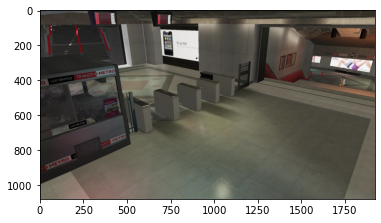

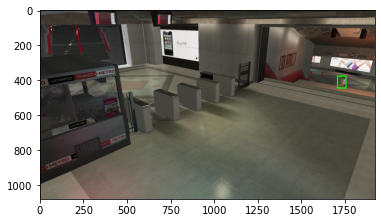

In [6]:
video = imageio.get_reader(cam_file_list[0], 'ffmpeg')
cnt = 0
for frame in (video):
    plt.imshow(frame)
    plt.show()
    cnt += 1
    cp_frame = frame.copy()
    xmin, xmax = df.iloc[0]['x_top_left_BB'], df.iloc[0]['x_bottom_right_BB']
    ymin, ymax = df.iloc[0]['y_top_left_BB'], df.iloc[0]['y_bottom_right_BB']
    cv2.rectangle(cp_frame,(xmin,ymin),(xmax,ymax),(0,255,0),5)
    plt.imshow(cp_frame)
    plt.show()
    break
# pylab.show()